## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\googleplaystore.csv - googleplaystore.csv.csv")#Reading the data

In [6]:
df.head()#Printing the head

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.shape

(10841, 13)

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

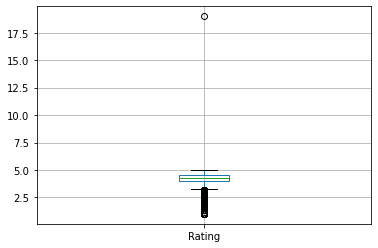

In [9]:
df.boxplot() # Boxplot shows value >5,i.e. not possible

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

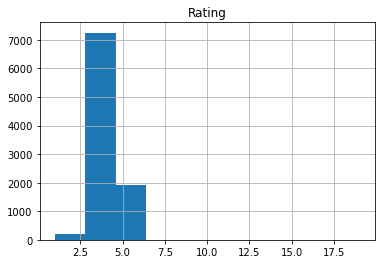

In [10]:
df.hist()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
## check how many ratings have more than 5 Rating
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df.drop([10472],inplace=True)#Dropped junk,impractical data

<AxesSubplot:>

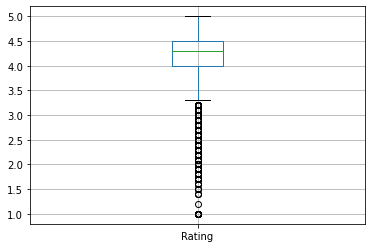

In [15]:
df.boxplot() # Correct boxplot

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

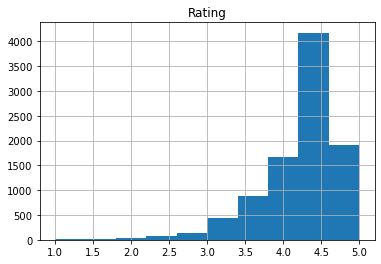

In [16]:
df.hist()

## Data Imputation and Manipulation

In [17]:
## find the null values with appropriate values using aggregate functions such as mean,median ,mode
def impute_median(series):
    return series.fillna(series.median())

In [18]:
df.Rating=df['Rating'].transform(impute_median)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [19]:
#modes of categorical values
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [20]:
# Fill the missing categorical values with mode
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [21]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
# convert Price,Reviews and Ratings into Numerical Data
df['Price']=df['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x: float(x))
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [23]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: float(x))

In [24]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Data Visualization

In [25]:
# Grouping on the basis of categories
grp=df.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print("\n")
print(y)
print("\n")
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

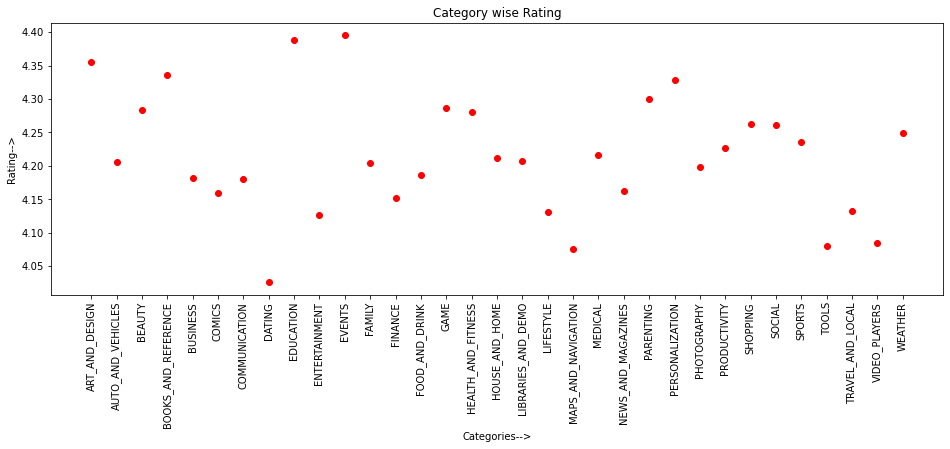

In [26]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

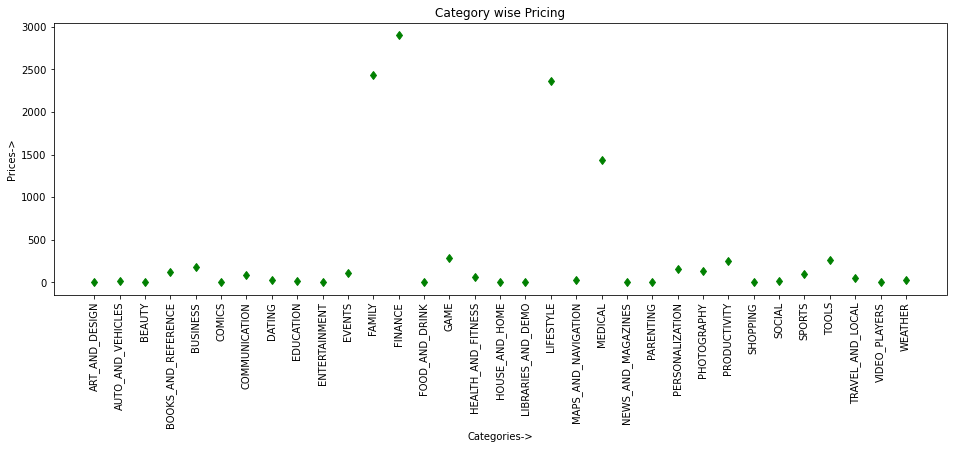

In [27]:
plt.figure(figsize=(16,5))
plt.plot(y,'rd',color='g')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories->')
plt.ylabel('Prices->')
plt.show()

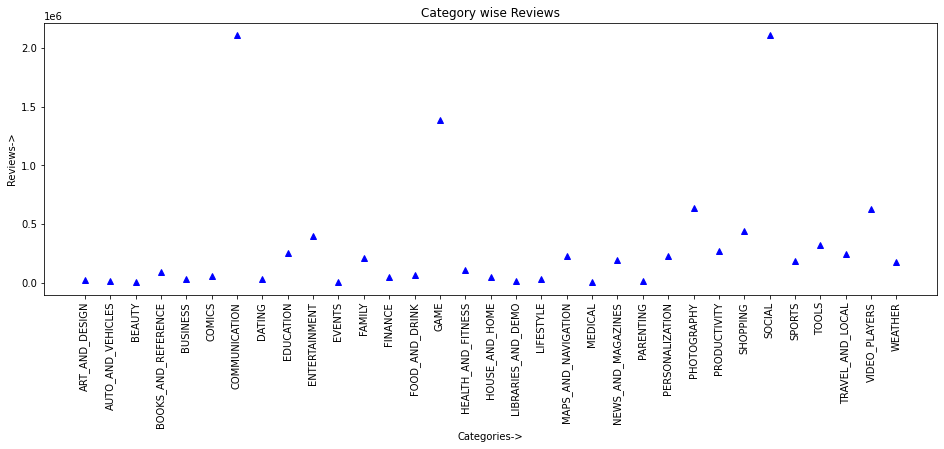

In [28]:
plt.figure(figsize=(16,5))
plt.plot(z,'g^',color='b')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories->')
plt.ylabel('Reviews->')
plt.show()

In [29]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')#I have filtered my warnings here


### Deep analysis and distributions

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

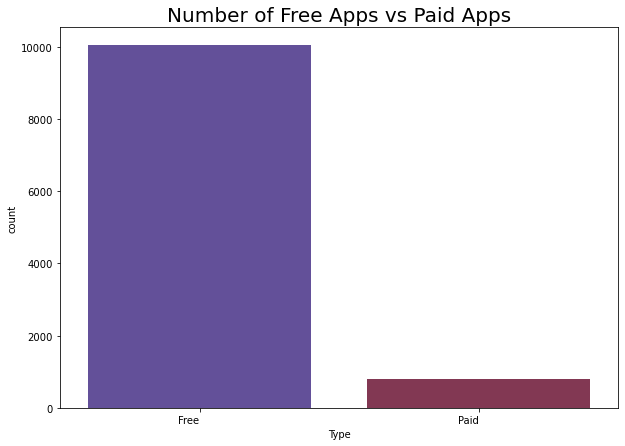

In [30]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)

Text(0.5, 1.0, 'Number of apps for every price')

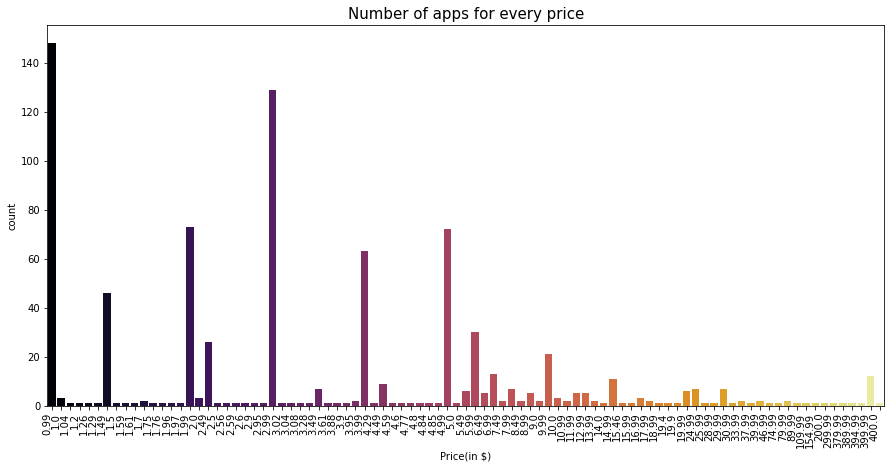

In [31]:
df['Price(in $)'] = df['Price'].apply(lambda x: float(x))
rcParams['figure.figsize'] = 15,7
priced_apps=df[df['Price(in $)'] != 0.0]
price_plot = sns.countplot(priced_apps['Price(in $)'], palette = "inferno")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
price_plot 
plt.title('Number of apps for every price',size = 15)

Text(0.5, 1.0, 'Installs count distribution')

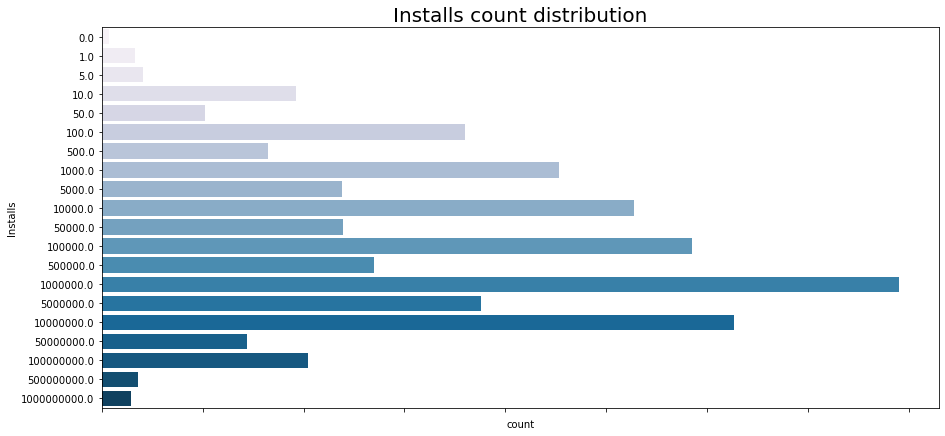

In [32]:
rcParams['figure.figsize'] = 15,7
install_plot = sns.countplot(y="Installs",data=df, palette = "PuBu")
install_plot.set_xticklabels(install_plot.get_xticklabels(), rotation=90, ha="right")
install_plot 
plt.title('Installs count distribution',size = 20)

Text(0.5, 1.0, 'Rating Distribution')

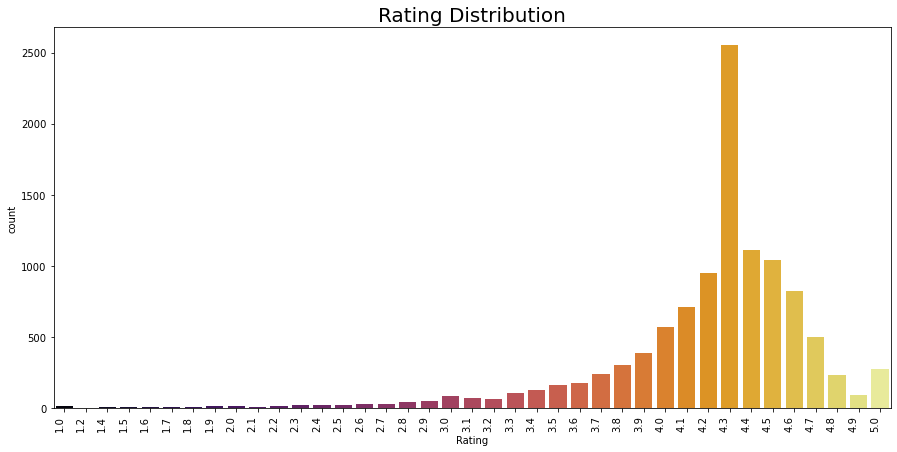

In [33]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="Rating",data=df, palette = "inferno")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Rating Distribution',size = 20)

Text(0.5, 1.0, 'Content Rating distribution')

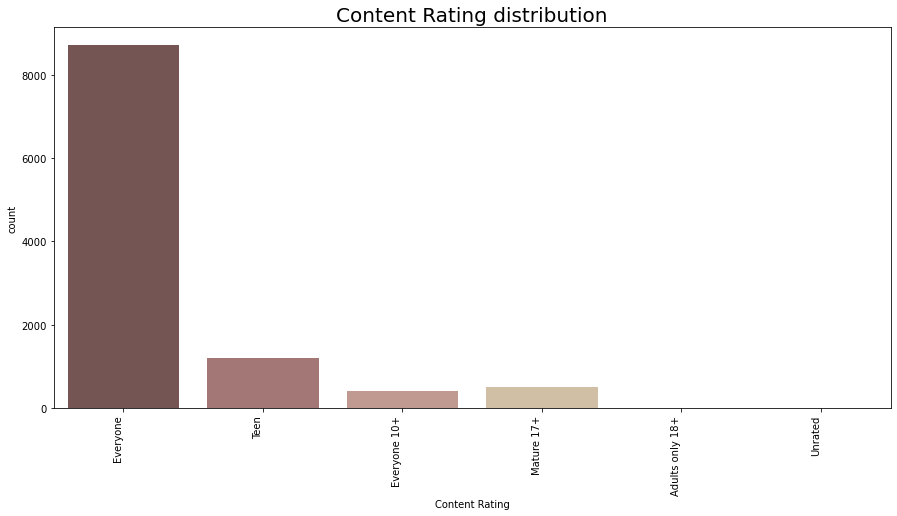

In [34]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df, palette = "pink")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

In [35]:
df= df.drop_duplicates(subset='App',keep='first')
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df[['App','Installs','Category','Content Rating','Price(in $)']].head()

,App,Installs,Category,Content Rating,Price(in $)
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,ART_AND_DESIGN,Everyone,0.0
1,Coloring book moana,500000,ART_AND_DESIGN,Everyone,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,ART_AND_DESIGN,Everyone,0.0
3,Sketch - Draw & Paint,50000000,ART_AND_DESIGN,Teen,0.0
4,Pixel Draw - Number Art Coloring Book,100000,ART_AND_DESIGN,Everyone,0.0


In [36]:
newdf=df[['App','Installs','Category','Content Rating','Price(in $)','Reviews','Genres']].groupby(['Installs'], sort = True)
newdf=newdf.filter(lambda x: x['Installs'].mean() >= 1000000000)
newdf=newdf.sort_values(by=['Installs'])
newdf

,App,Installs,Category,Content Rating,Price(in $),Reviews,Genres
152,Google Play Books,1000000000,BOOKS_AND_REFERENCE,Teen,0.0,1433233,Books & Reference
3665,YouTube,1000000000,VIDEO_PLAYERS,Teen,0.0,25655305,Video Players & Editors
3454,Google Drive,1000000000,PRODUCTIVITY,Everyone,0.0,2731171,Productivity
3234,Google,1000000000,TOOLS,Everyone,0.0,8033493,Tools
3127,Google Street View,1000000000,TRAVEL_AND_LOCAL,Everyone,0.0,2129689,Travel & Local
3117,Maps - Navigate & Explore,1000000000,TRAVEL_AND_LOCAL,Everyone,0.0,9235155,Travel & Local
2808,Google Photos,1000000000,PHOTOGRAPHY,Everyone,0.0,10858556,Photography
2554,Google+,1000000000,SOCIAL,Teen,0.0,4831125,Social
2545,Instagram,1000000000,SOCIAL,Teen,0.0,66577313,Social
2544,Facebook,1000000000,SOCIAL,Teen,0.0,78158306,Social


Text(0.5, 1.0, 'Top Categories for Free Apps')

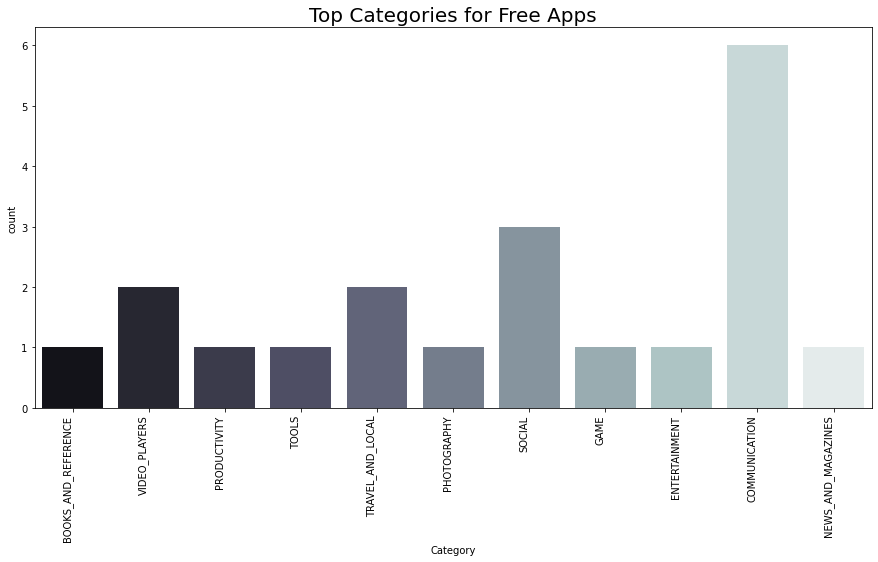

In [37]:
rcParams['figure.figsize'] = 15,7
free_categories = sns.countplot(x="Category",data=newdf, palette = "bone")
free_categories.set_xticklabels(free_categories.get_xticklabels(), rotation=90, ha="right")
free_categories 
plt.title('Top Categories for Free Apps',size = 20)

Text(0.5, 1.0, 'Top Genres for Free Apps')

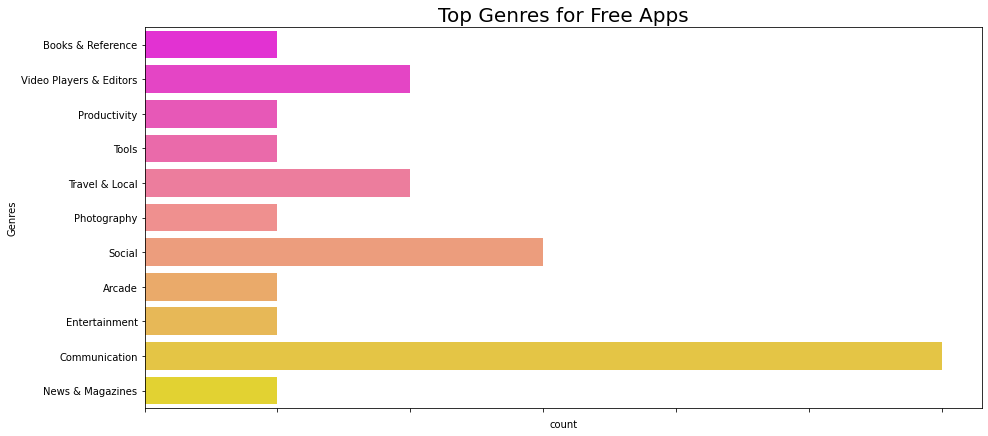

In [38]:
rcParams['figure.figsize'] = 15,7
free_genres = sns.countplot(y="Genres",data=newdf, palette = "spring")
free_genres.set_xticklabels(free_genres.get_xticklabels(), rotation=90, ha="right")
free_genres 
plt.title('Top Genres for Free Apps',size = 20)

### Top categories for paid apps

In [39]:
new=df[['App','Category','Content Rating','Price(in $)','Reviews']].groupby(['Price(in $)'], sort = True)
new=new.filter(lambda x: x['Price(in $)'].mean() != 0)
new=new.sort_values(by=['Price(in $)'])
new
newdf2=df[['App','Installs','Genres']].groupby(['Installs'], sort = True)
newdf2=newdf2.filter(lambda x: x['Installs'].mean() >= 1000000)
newdf2=newdf2.sort_values(by=['Installs'])
newdf2

s1 = pd.merge(new, newdf2, how='inner', on=['App'])
s1

,App,Category,Content Rating,Price(in $),Reviews,Installs,Genres
0,Cut the Rope GOLD,FAMILY,Everyone,0.99,61264,1000000,Puzzle
1,Hitman Sniper,GAME,Mature 17+,0.99,408292,10000000,Action
2,HD Widgets,PERSONALIZATION,Everyone,0.99,58617,1000000,Personalization
3,Infinity Dungeon VIP,FAMILY,Everyone 10+,0.99,21804,1000000,Role Playing
4,Fruit Ninja Classic,GAME,Everyone,0.99,85468,1000000,Arcade
5,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,Teen,0.99,13604,1000000,Action
6,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,Teen,0.99,32496,1000000,Action
7,Lost Journey (Dreamsky),GAME,Everyone,0.99,32344,1000000,Adventure
8,Stickman Legends: Shadow Wars,GAME,Everyone 10+,0.99,38419,1000000,Action
9,Where's My Water?,FAMILY,Everyone,1.99,188740,1000000,Puzzle;Brain Games


Text(0.5, 1.0, 'Top Categories for PAID APPS')

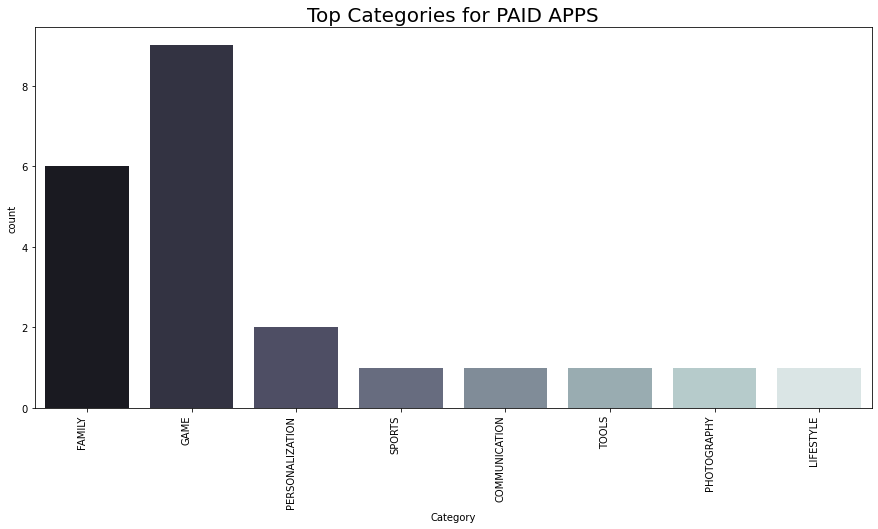

In [40]:
rcParams['figure.figsize'] = 15,7
paid_categories = sns.countplot(x="Category",data=s1, palette = "bone")
paid_categories.set_xticklabels(paid_categories.get_xticklabels(), rotation=90, ha="right")
paid_categories 
plt.title('Top Categories for PAID APPS',size = 20)

Text(0.5, 1.0, 'Top Genres for PAID APPS')

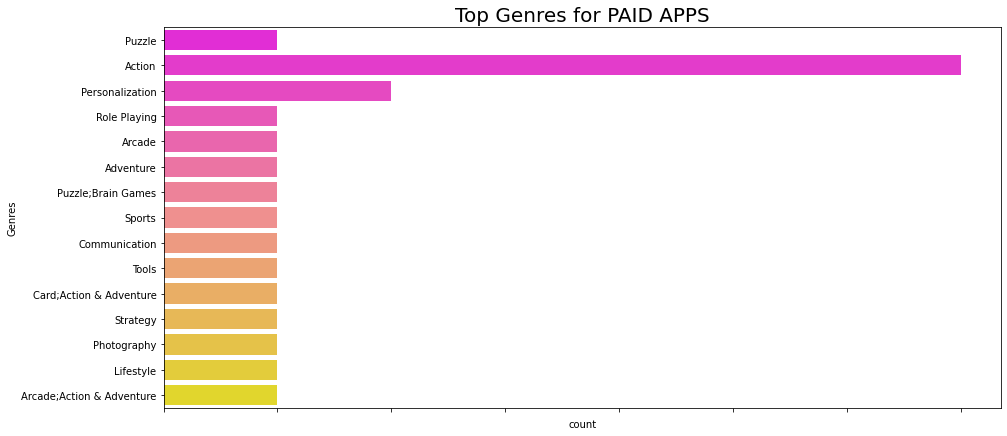

In [41]:
rcParams['figure.figsize'] = 15,7
paid_genres = sns.countplot(y="Genres",data=s1, palette = "spring")
paid_genres.set_xticklabels(paid_genres.get_xticklabels(), rotation=90, ha="right")
paid_genres 
plt.title('Top Genres for PAID APPS',size = 20)

### System version

In [42]:
df['new'] = pd.to_datetime(df['Last Updated'])
df.drop(labels = ['Last Updated'], axis = 1, inplace = True)
df.rename(columns={'new': 'Last Updated'}, inplace=True)

Text(0.5, 1.0, 'Time series plot of Last Updates')

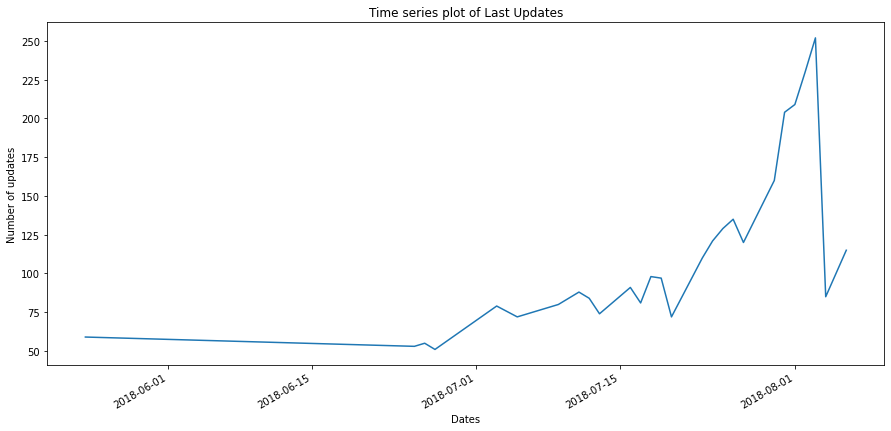

In [43]:
freq= pd.Series()# Making a series here
freq=df['Last Updated'].value_counts()
newfreq=freq[freq>50]
newfreq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

### Final Plots

In [44]:
df['Rating'] = df['Rating'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

newdf_rate=df[['App','Rating','Category','Content Rating']].groupby(['Rating'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x['Rating'].mean() >= 4.5)
newdf_rate=newdf_rate.sort_values(by=['Rating'])

newdf_reviews=df[['App','Reviews']].groupby(['Reviews'], sort = True)
newdf_reviews=newdf_reviews.filter(lambda x: x['Reviews'].mean() >= 25000)
newdf_reviews=newdf_reviews.sort_values(by=['Reviews'])

newdf_installs=df[['App','Installs']].groupby(['Installs'], sort = True)
newdf_installs=newdf_installs.filter(lambda x: x['Installs'].mean() >= 10000000)
newdf_installs=newdf_installs.sort_values(by=['Installs'])

s1 = pd.merge(newdf_reviews, newdf_rate, how='inner', on=['App'])
s2 = pd.merge(s1, newdf_installs, how='inner', on=['App'])
s2

,App,Reviews,Rating,Category,Content Rating,Installs
0,"Calculator - free calculator, multi calculator...",25592,4.6,TOOLS,Everyone,10000000
1,ASUS SuperNote,26559,4.5,PRODUCTIVITY,Everyone,10000000
2,ASUS Sound Recorder,34126,4.5,TOOLS,Everyone,10000000
3,ABC Kids - Tracing & Phonics,36606,4.5,FAMILY,Everyone,10000000
4,Bounce Classic,38297,4.5,GAME,Everyone,10000000
...,...,...,...,...,...,...
449,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7,TOOLS,Everyone,500000000
450,Subway Surfers,27722264,4.5,GAME,Everyone 10+,1000000000
451,Clean Master- Space Cleaner & Antivirus,42916526,4.7,TOOLS,Everyone,500000000
452,Clash of Clans,44891723,4.6,GAME,Everyone 10+,100000000


In [45]:
df2=df[['App','Reviews','Rating','Installs','Category']][df.Installs==df['Installs'].max()]
df2.head()

,App,Reviews,Rating,Installs,Category
152,Google Play Books,1433233,3.9,1000000000,BOOKS_AND_REFERENCE
335,Messenger – Text and Video Chat for Free,56642847,4.0,1000000000,COMMUNICATION
336,WhatsApp Messenger,69119316,4.4,1000000000,COMMUNICATION
338,Google Chrome: Fast & Secure,9642995,4.3,1000000000,COMMUNICATION
340,Gmail,4604324,4.3,1000000000,COMMUNICATION


Text(0.5, 1.0, 'CATEGORIES OF MOST INSTALLED APPS')

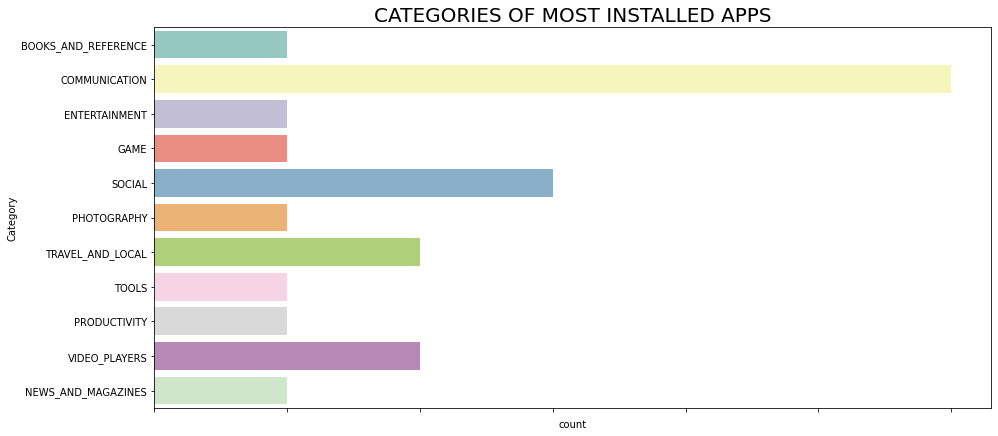

In [46]:
rcParams['figure.figsize'] = 15,7
top_installs=sns.countplot(y="Category",data=df2,palette = "Set3")
top_installs.set_xticklabels(top_installs.get_xticklabels(), rotation=90, ha="right")
top_installs
plt.title('CATEGORIES OF MOST INSTALLED APPS',size = 20)

Text(0.5, 1.0, 'CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE')

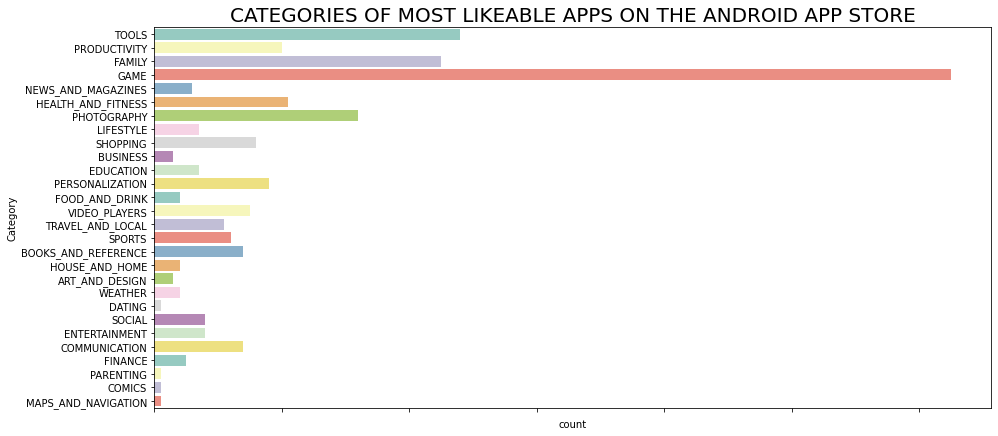

In [47]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=s2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.title('CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE',size = 20)

## Summary and overall analysis :


###### Procedure followed

### Initial steps -
* Collecting the dataset using pandas
* Drawing box plots and histogram with initial data

### Data Imputation and Manipulation 
* Check null values
* Convert Price,Reviews and Ratings into Numerical Data


### Data Visualization
* Split data into category-wise Pricing,Data & Reviews
* Plot category-wise Pricing,Data & Reviews


### Deep analysis and distributions
* Free vs paid apps count
* App price plots

**Distribution plots made -**
* Installs Count
* App Rating
* Content-age Rating

**Additional bar plots used -**

* Top categories for free apps
* Top genres for free apps
* Top categories for paid apps
* Top genres for paid apps

### System Version
* Plotting system version line plots

### Final Plots
 Here we have plotted categories of most likeable apps on android store plot,where we have classified on basis of -
 * Rating >=4.5
 * Reviews >=25000
 * Number of installs >=10M
 
 and plotted accordingly on app-category vs the number of apps in each category.
 We have also plotted solely based on basis of top installed app categories.

# Summary

1) Gaming top the list with most reviews,best ratings and most installations

2) Solely based on installs,we get may not get the whole view, as seen by only plotting most installed apps by categories,where communication takes the lead

3) The general trend shows gaming as most reviewed and installed category

4) Most of the apps were updated between July 15th,2018 and August 1st,2018

5) **Communication** was the most popular genre & category for downloading of free apps

6) **Game** was the most popular category & **Action** was the top genre

7) **Free** apps exist more in count than **Paid** apps

8) **Social** category apps' have most reviews

8) **Finance** category has most expensive paid apps

9) **Events** category has most high rated apps